In [1]:
from infrastructure.dataclasses import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameteres=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="fast_non_linear_vector_quantile_regression",
    pushforward_operator_parameters=dict(input_dimension=1, embedding_dimension=5, hidden_dimension=100, number_of_hidden_layers=1),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=5000,
        verbose=True,
        optimizer_parameters=dict(lr=0.1),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)

Epoch: 5000, Objective: 2.828, LR: 0.000000: 100%|██████████| 5000/5000 [03:17<00:00, 25.36it/s]


/Users/vladimirkondratev/conditional_quantile_function/src/quantile_regression/fast_non_linear_vector_quantile_regression.py:203: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point = torch.tensor(point)


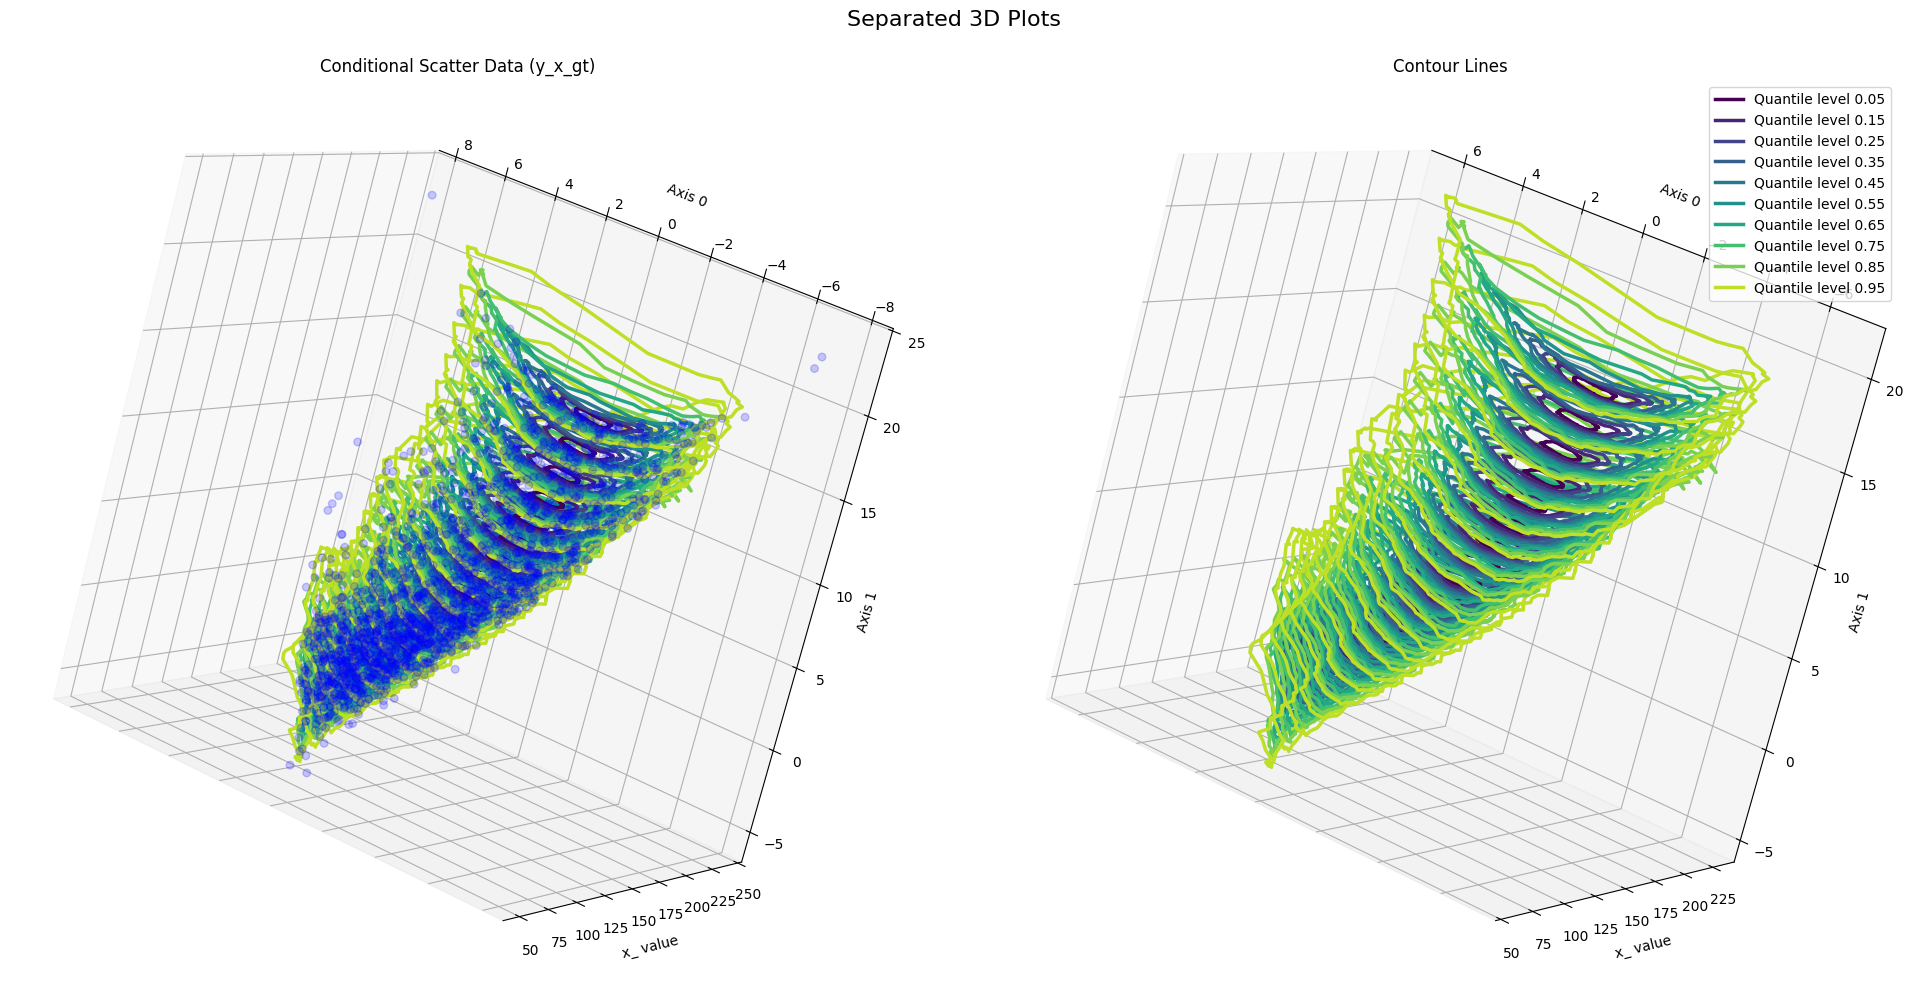

In [2]:
%matplotlib inline
from utils import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(model=model, device_and_dtype_specifications=experiment.tensor_parameteres)